<a href="https://colab.research.google.com/github/SashaHough/GG3209-Lab-2/blob/main/Assignment_2_0842286611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 6: K-Means - DBSCAN clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install mapclassify

In [ ]:
pip install contextily

In [ ]:
pip install lonboard

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
import lonboard as lb
from lonboard import Map, ScatterplotLayer
from lonboard import viz

T1 Data Exploration: Load the Chicago parcels dataset using Pandas

In [ ]:
parcels = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/chicago_parcels/Chicago_parcels.shp')

T2: Display the first few rows of the dataset. Investigate the available attributes and their data
types.

In [ ]:
print(parcels.head()) # displaying first 4 rows of data
print(parcels.dtypes) # investigates attributes and their data types

   POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...  
POLY_ID        int32
ID             int64
AREA         float64
PIN_OLD        int64
PIN            int64
geometry    geometry
dtype: object


T3: Create a map to visualize the spatial distribution of tax parcel polygons in Chicago. This is a
dataset with more than a half millions of records, therefore if you use the traditional matplotlib or
pandas you will reach the RAM limit of Colab, you need to use lonboard library and the
SolidPolygonLayer layer to render polygons.

In [ ]:
parcels.crs # checking reference system
parcels = parcels.to_crs(epsg=4326)

In [ ]:
viz(parcels)

T4 Correlation Analysis: Explore correlations between spatial attributes (latitude, longitude)
and numerical attributes. Using the text cell, provide insights into any observed correlations.

In [ ]:
# adding columns for latitude and longitude
parcels['centroid'] = parcels.geometry.centroid # creating new variable with venter point for each polygon
parcels['latitude'] = parcels['centroid'].y # taking y from centroid and saving it as latitude in new column
parcels['longitude'] = parcels['centroid'].x # taking x from centroid and saving it as longitude
print(parcels.head) # chekcing new dataset

<bound method NDFrame.head of         POLY_ID      ID  AREA     PIN_OLD         PIN  \
0             1      93  0.01   836300010   836300010   
1             2      94  0.00   836300011   836300011   
2             3      96  0.02   836300013   836300013   
3             4      95  0.01   836300012   836300012   
4             5      92  0.01   836300009   836300009   
...         ...     ...   ...         ...         ...   
592516   592517  588217  0.00 -2147483648 -2147483648   
592517   592518  588218  0.00 -2147483648 -2147483648   
592518   592519  588216  0.00 -2147483648 -2147483648   
592519   592520  588215  0.00 -2147483648 -2147483648   
592520   592521  588492  0.00 -2147483648 -2147483648   

                                                 geometry  \
0       POLYGON ((1091182.694 1942890.287, 1091173.159...   
1       POLYGON ((1092430.298 1943191.955, 1092463.452...   
2       POLYGON ((1092323.996 1942962.61, 1092301.306 ...   
3       POLYGON ((1092024.119 1942447.762

In [ ]:
# preforming correlaiton analysis
corr_var = ['latitude', 'longitude', 'AREA'] # saving columns being used in correlation in seperate object
corr_m = parcels[corr_var].corr() # running a correlation across all three variables to create a correlation matrix
print(corr_m)

           latitude  longitude      AREA
latitude   1.000000  -0.612231 -0.010339
longitude -0.612231   1.000000  0.005312
AREA      -0.010339   0.005312  1.000000


Insights: The relationship between area and both latitude and longitude is quite small and near zero. The relationship is slightly stronger and also negative between area and latitude while the one between area and longitude is about half as strong and positive. Overall, the correlations between latitude and longitude with area are very weak nd suggest that the area of the polygons does not show any trend with coordinates/geographic location.

T5 K-Means Clustering: Implement K-Means clustering with different values of n_clusters.

In [ ]:
# K-Means Clutering with 5 clusters
kmeans5 = KMeans(n_clusters=5, random_state=42) # creating kmeans with 5 clusters
parcels['kmeans_cluster5'] = kmeans5.fit_predict(parcels[['longitude', 'latitude']]) #creating new column in 'parcels' fitting the 'kmeans5' cluster parameters to the geospatial data (lat and long)

# K-means clustering with 8 clusters
kmeans8 = KMeans(n_clusters=8, random_state=42)
parcels['kmeans_cluster8'] = kmeans8.fit_predict(parcels[['longitude', 'latitude']])

# K-means clustering with 12 clusters
kmeans5 = KMeans(n_clusters=12, random_state=42)
parcels['kmeans_cluster12'] = kmeans5.fit_predict(parcels[['longitude', 'latitude']])

T6: Visualize the clustering results for each value of n_clusters, using multiple lonboard maps,
and customized colour ramps.

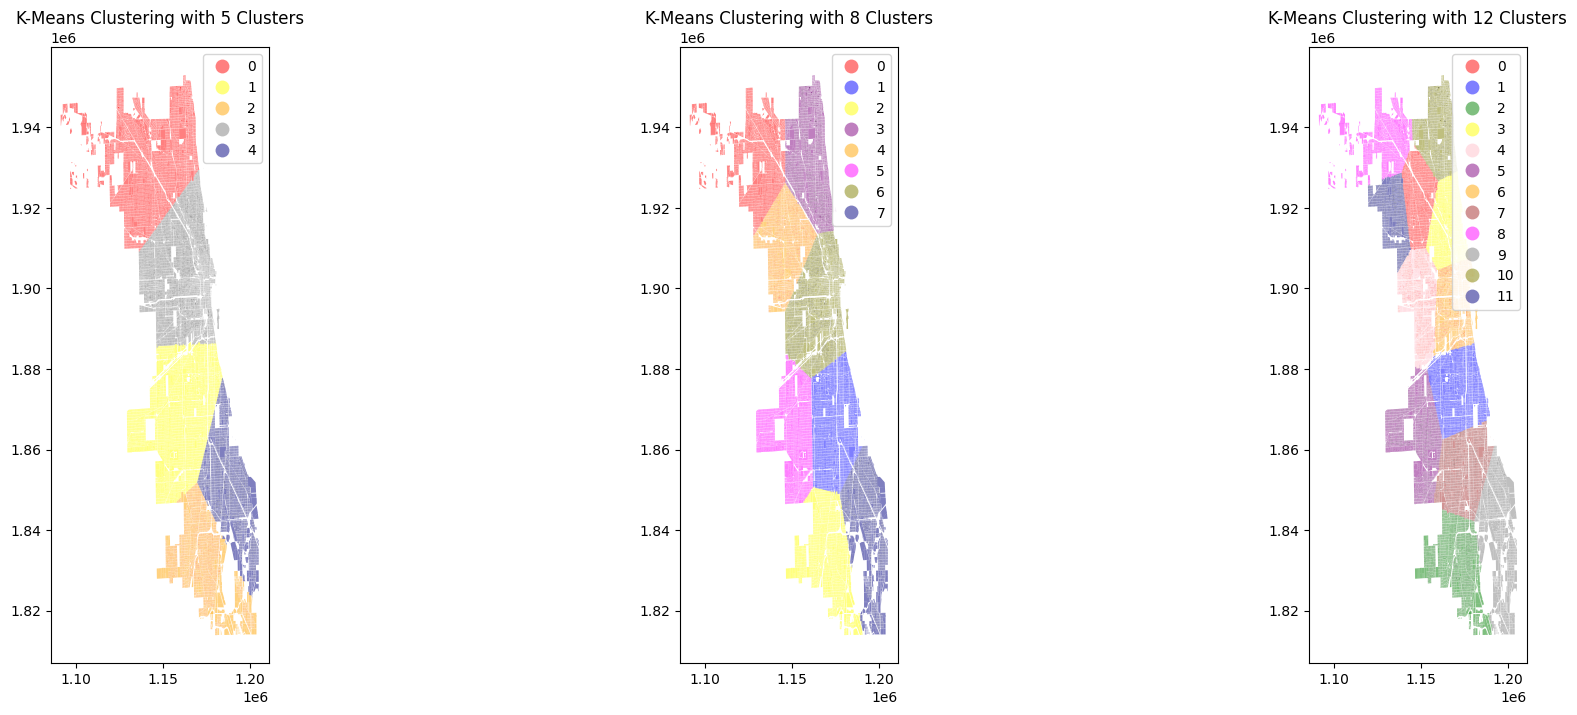

In [ ]:
# cutom color ramps
import matplotlib.colors as mcolors # needed to make the custom color ramp
clr_ramp = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'magenta', 'gray', 'olive', 'navy'] # chosen colors
cstm_m = mcolors.ListedColormap(clr_ramp) # making it into a color ramp

fig, axes = plt.subplots(1, 3, figsize=(23, 8))  # Creating figures and axes for the 3 plots

# plot with 5 clusters
parcels.plot(ax=axes[0], column='kmeans_cluster5', categorical=True, legend=True, markersize=1, alpha=0.5, cmap=cstm_m) # plotting the 5 cluster column from 'parcels' as a cetegory. with a legend, and using custom color ramp
axes[0].set_title('K-Means Clustering with 5 Clusters') # setting the title of the plot

# reapeat for plot with 8 clusters
parcels.plot(ax=axes[1], column='kmeans_cluster8', categorical=True, legend=True, markersize=1, alpha=0.5, cmap=cstm_m)
axes[1].set_title('K-Means Clustering with 8 Clusters')

# repeat for plot with 12 clusters
parcels.plot(ax=axes[2], column='kmeans_cluster12', categorical=True, legend=True, markersize=1, alpha=0.5, cmap=cstm_m)
axes[2].set_title('K-Means Clustering with 12 Clusters')

plt.show() # plotting all graphs

T7: Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your
choice in a markdown cell.

I beleve the optimal value for n_clusters is 12. The plots with only 5 or 8 clusters appear to not break up the parcels into enough small enough groups. Seeing as there are a high volume of parcels it is likely best to use 12 clusters as each cluster would each contain a more magable number of parcels than either 5 or 8, although this may depend on their use.

T8: DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of
eps and min_samples in DBSCAN ( at least three)


In [ ]:
# DBSCAN clustering with three different eps (.005, .1, .5) and three different min_samples(30, 20, 10)
dbscan1 = DBSCAN(eps=0.1, min_samples=5) # specifying the esp and min_samples for the DBSCAN
parcels['dbscan1_cluster'] = dbscan1.fit_predict(parcels[['longitude', 'latitude']]) # creating new column in 'parcels' fitting the 'dbscan1' cluster parameters to the geospatial data (lat and long)

# repeating this for the other 8 variations
dbscan2 = DBSCAN(eps=0.01, min_samples=10)
parcels['dbscan2_cluster'] = dbscan2.fit_predict(parcels[['longitude', 'latitude']])

dbscan3 = DBSCAN(eps=0.01, min_samples=15)
parcels['dbscan3_cluster'] = dbscan3.fit_predict(parcels[['longitude', 'latitude']])

dbscan4 = DBSCAN(eps=0.025, min_samples=5)
parcels['dbscan4_cluster'] = dbscan4.fit_predict(parcels[['longitude', 'latitude']])

dbscan5 = DBSCAN(eps=0.025, min_samples=10)
parcels['dbscan5_cluster'] = dbscan5.fit_predict(parcels[['longitude', 'latitude']])

dbscan6 = DBSCAN(eps=0.025, min_samples=15)
parcels['dbscan6_cluster'] = dbscan6.fit_predict(parcels[['longitude', 'latitude']])

dbscan7 = DBSCAN(eps=0.05, min_samples=5)
parcels['dbscan7_cluster'] = dbscan7.fit_predict(parcels[['longitude', 'latitude']])

dbscan8 = DBSCAN(eps=0.05, min_samples=10)
parcels['dbscan8_cluster'] = dbscan8.fit_predict(parcels[['longitude', 'latitude']])

dbscan9 = DBSCAN(eps=0.05, min_samples=15)
parcels['dbscan9_cluster'] = dbscan9.fit_predict(parcels[['longitude', 'latitude']])

T9: Plot the clustering results for each combination of parameters. Therefore, you should create
a plot matrix 3*3 ( min_samples and eps)


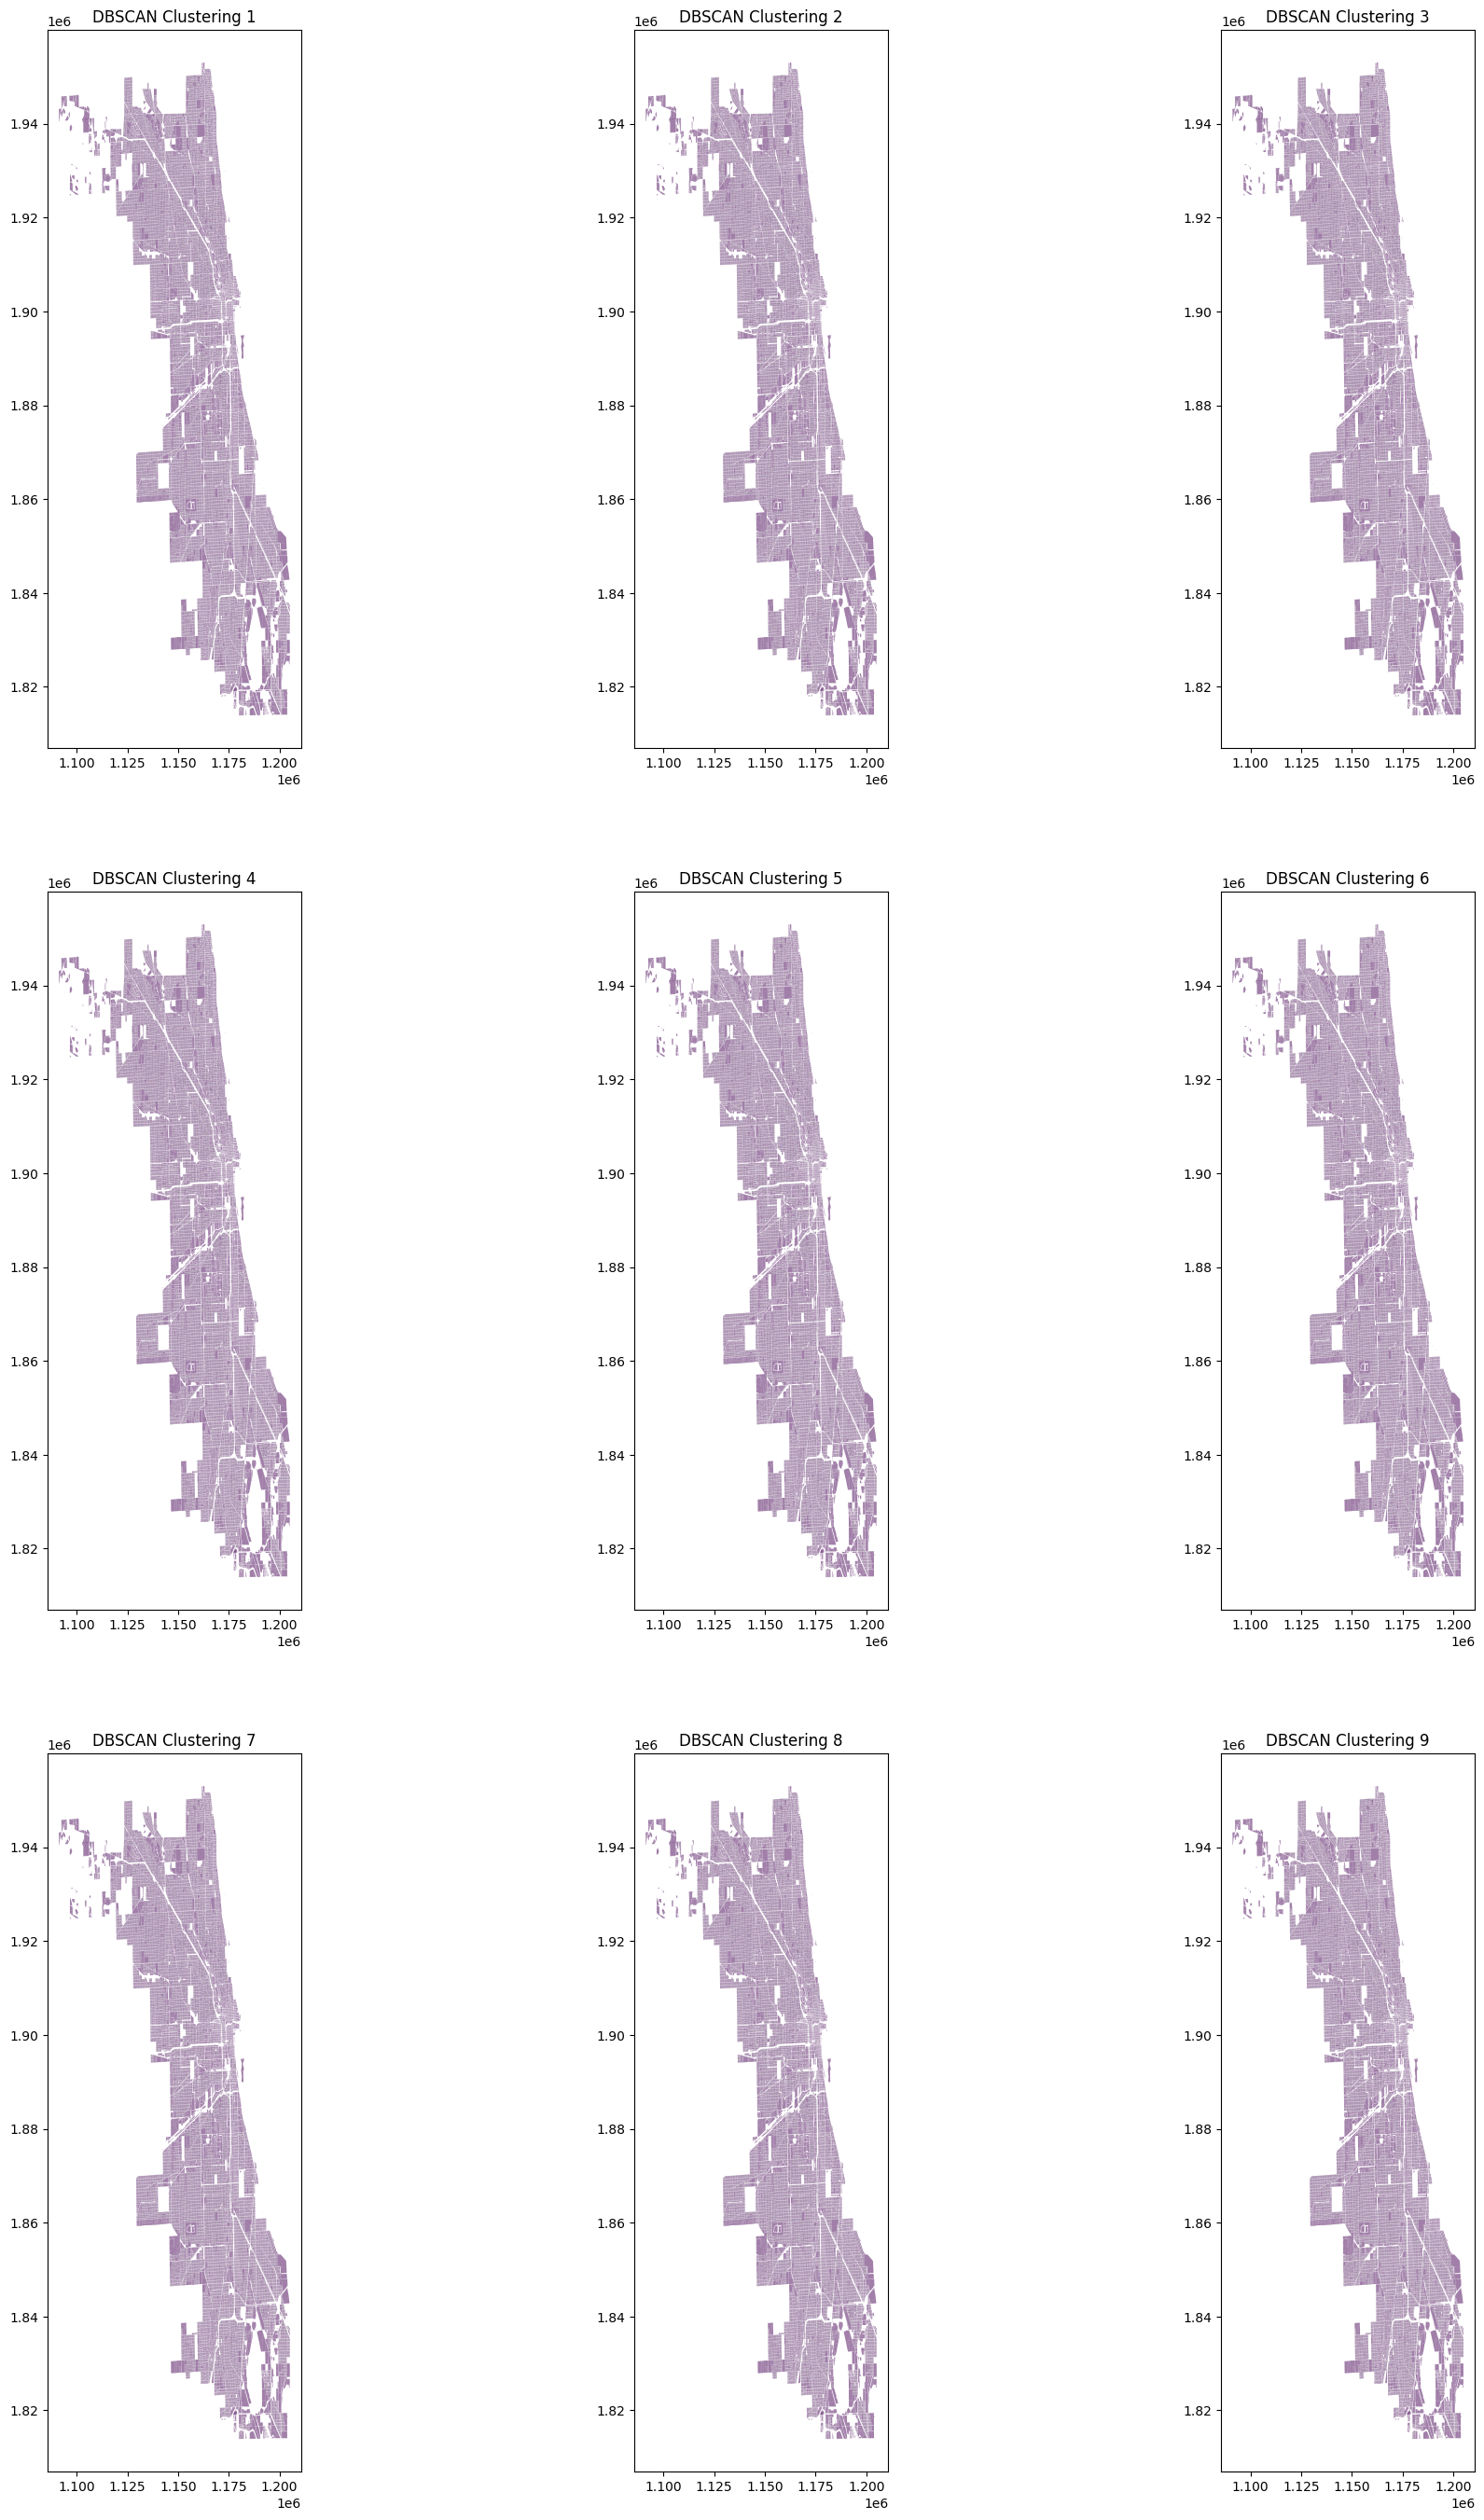

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(23, 24)) #  x 3 matrix of figures

# plotting the different DBSCAN clusters
parcels.plot(ax=axes[0,0], column='dbscan1_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0,0].set_title('DBSCAN Clustering 1')

parcels.plot(ax=axes[0,1], column='dbscan2_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0,1].set_title('DBSCAN Clustering 2')

parcels.plot(ax=axes[0,2], column='dbscan3_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[0,2].set_title('DBSCAN Clustering 3')

parcels.plot(ax=axes[1,0], column='dbscan4_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1,0].set_title('DBSCAN Clustering 4')

parcels.plot(ax=axes[1,1], column='dbscan5_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1,1].set_title('DBSCAN Clustering 5')

parcels.plot(ax=axes[1,2], column='dbscan6_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[1,2].set_title('DBSCAN Clustering 6')

parcels.plot(ax=axes[2,0], column='dbscan7_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[2,0].set_title('DBSCAN Clustering 7')

parcels.plot(ax=axes[2,1], column='dbscan8_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[2,1].set_title('DBSCAN Clustering 8')

parcels.plot(ax=axes[2,2], column='dbscan9_cluster', categorical=True, legend=False, markersize=1, alpha=0.5, cmap='viridis')
axes[2,2].set_title('DBSCAN Clustering 9')

plt.show()

T10: Using a text cell write your insights about the impact of modifying the eps and min_samples
parameters, and finally recommend suitable values for eps and min_samples based on your
analysis. Note: Consider the real-world implications of your findings, especially in the context of
urban planning or data-driven decision-making.


I spent aproximaintly 3 hours manipulating and running the dbscan with differing values of eps (ranging from .005 to 1) and min_samples (ranging from 2 to 50) and was unable to produce a viable plot - this was removed to make the final document more concise. After investigating the dbscan_cluster columns I found all values to be -1 using 'print(parcels['dbscan1_cluster'].value_counts())', indicating they were 'noise' in the DBSCAN. With this in mind I continued to alter the parameters of eps and min_clusters and checking the value_counts of the columns make the process more efficient but I continued to get -1.